In [4]:
import os
import scanpy as sc

In [5]:
base_dir = '/Users/christoffer/Downloads/GSE224398_RAW/'
files = os.listdir(base_dir)
filtered = [f for f in files if "filtered" in f]
filtered

['GSM7021716_A_3m_filtered_feature_bc_matrix.h5',
 'GSM7021713_C_3m_filtered_feature_bc_matrix.h5',
 'GSM7021715_A_1m_filtered_feature_bc_matrix.h5',
 'GSM7021717_A_6m_filtered_feature_bc_matrix.h5',
 'GSM7021714_C_6m_filtered_feature_bc_matrix.h5',
 'GSM7021712_C_1m_filtered_feature_bc_matrix.h5']

In [6]:
ad_list = []
for i in filtered:
    print(i)
    ad_int = sc.read_10x_h5(base_dir + i)
    ad_int.obs['file_name'] = i
    ad_int.obs_names_make_unique()    
    ad_list.append(ad_int)

GSM7021716_A_3m_filtered_feature_bc_matrix.h5
GSM7021713_C_3m_filtered_feature_bc_matrix.h5
GSM7021715_A_1m_filtered_feature_bc_matrix.h5
GSM7021717_A_6m_filtered_feature_bc_matrix.h5
GSM7021714_C_6m_filtered_feature_bc_matrix.h5


/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


GSM7021712_C_1m_filtered_feature_bc_matrix.h5


/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [7]:
import scanpy as sc
import pandas as pd
import numpy as np

# --- 1) clean each AnnData in the list ---
cleaned = []
for i, a in enumerate(ad_list):
    a = a.copy()

    # ensure string indices
    a.var_names = pd.Index(a.var_names.astype(str).str.strip())
    a.obs_names = pd.Index(a.obs_names.astype(str).str.strip())

    # make var (genes) unique within each object
    a.var_names_make_unique()

    # make obs unique within each object (suffix duplicates)
    if hasattr(a, "obs_names_make_unique"):
        a.obs_names_make_unique()
    else:
        a.obs_names = a.obs_names.astype(str).to_series().where(
            ~a.obs_names.duplicated(), 
            a.obs_names + "-" + pd.Index(np.arange(a.n_obs).astype(str))
        ).values

    # drop duplicate columns in .var (rare but can confuse merge)
    a.var = a.var.loc[:, ~a.var.columns.duplicated()].copy()

    cleaned.append(a)

# --- 2) sanity check for duplicates ---
def _dup_report(idx, name):
    d = idx[idx.duplicated()]
    if len(d) > 0:
        print(f"[WARN] duplicated {name}: {len(d)} examples, e.g. {list(d[:5])}")

for i, a in enumerate(cleaned):
    _dup_report(a.var_names, f"var_names in ad_list[{i}]")
    _dup_report(a.obs_names, f"obs_names in ad_list[{i}]")

# --- 3) concat with labels/keys to avoid obs_name collisions across objects ---
keys = [f"batch{i}" for i in range(len(cleaned))]   # or your sample names if you have them

ad = sc.concat(
    cleaned,
    join="outer",                # keep union of genes
    label="batch",               # writes a .obs['batch']
    keys=keys,                   # populates that label from these keys
    index_unique="-",            # ensures obs_names = "<old>-<batch>"
    fill_value=0                 # fill missing genes with 0
)

/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [8]:
ad

AnnData object with n_obs × n_vars = 66810 × 34929
    obs: 'file_name', 'batch'

In [9]:
ad.var

""
0610005C13Rik
0610006L08Rik
0610007P14Rik
0610009B22Rik
0610009E02Rik
...
mt-Nd3
mt-Nd4
mt-Nd4l
mt-Nd5


In [11]:

# --- Choose how to detect mitochondrial genes ---
# Common: gene symbols starting with "mt-" (mouse) or "MT-" (human)
sym = ad.var_names.astype(str)

mt_mask = sym.str.startswith(("mt-","MT-"))

# If you have a chromosome column (e.g., "MT"), this is even better:
# if "chrom" in ad.var.columns:
#     mt_mask = ad.var["chrom"].astype(str).str.upper().eq("MT")

ad.var["mt"] = mt_mask

# --- Compute % mt counts per cell ---
sc.pp.calculate_qc_metrics(ad, qc_vars=["mt"], inplace=True)
# adds: ad.obs['pct_counts_mt'], 'total_counts', 'n_genes_by_counts', etc.

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


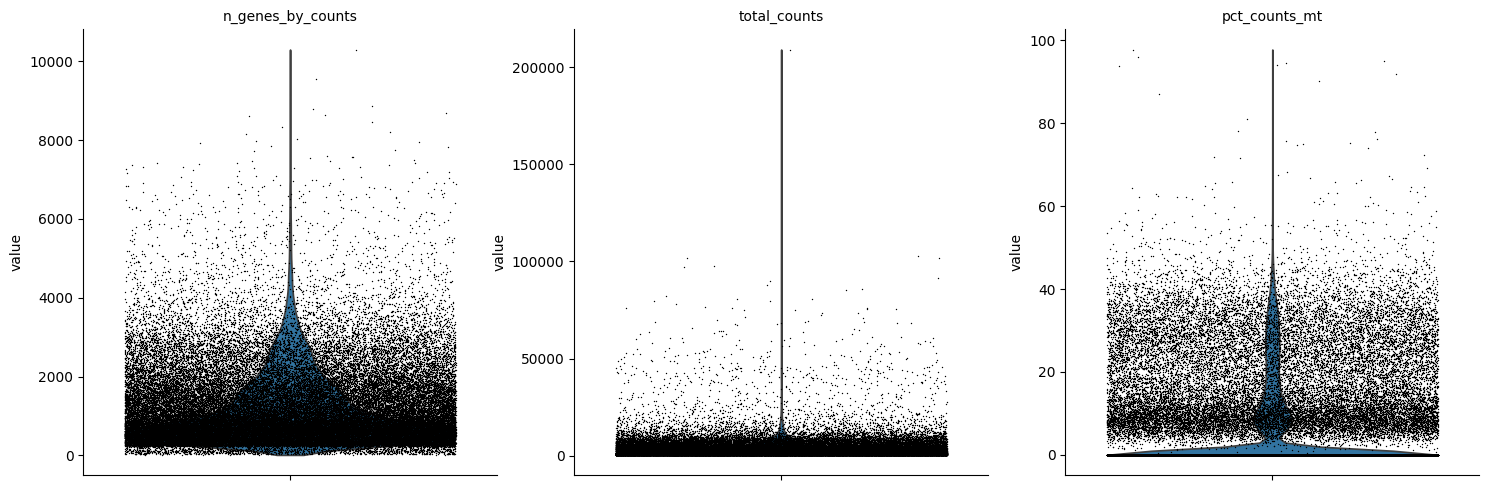

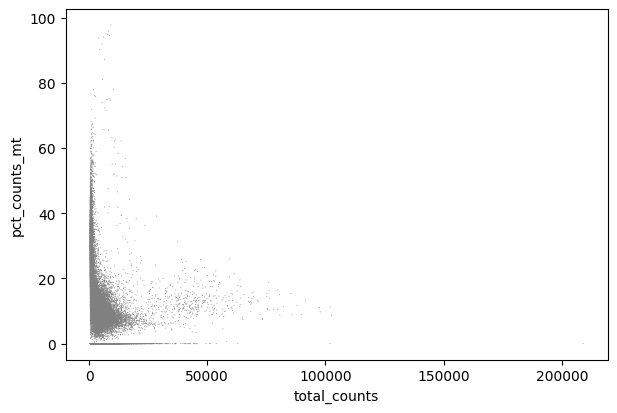

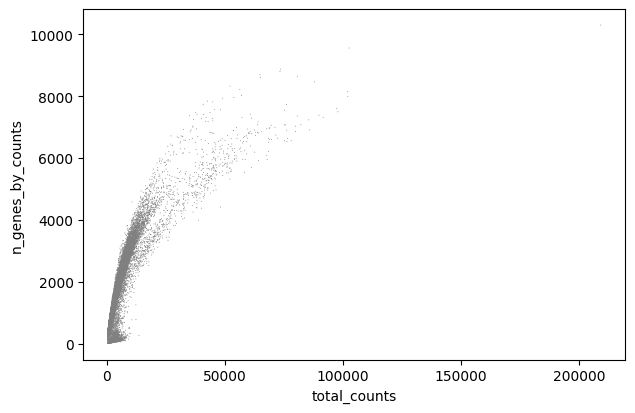

In [12]:
sc.pl.violin(ad, ["n_genes_by_counts","total_counts","pct_counts_mt"], jitter=0.4, multi_panel=True)
sc.pl.scatter(ad, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(ad, x="total_counts", y="n_genes_by_counts")

In [13]:
# Example thresholds – adjust to your dataset
ad = ad[ad.obs["pct_counts_mt"] < 10, :].copy()      # <10% mitochondrial
ad = ad[ad.obs["n_genes_by_counts"] > 200, :].copy() # remove very low-content cells
# (Optional) ad = ad[ad.obs["total_counts"].between(500, 50_000)].copy()

In [14]:
ad.obs

,file_name,batch,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt
AAACCTGAGAAGATTC-1-batch0,GSM7021716_A_3m_filtered_feature_bc_matrix.h5,batch0,894,6.796824,1441.0,7.273787,28.660652,37.751561,51.630812,72.657876,0.0,0.000000,0.000000
AAACCTGAGATGTGTA-1-batch0,GSM7021716_A_3m_filtered_feature_bc_matrix.h5,batch0,556,6.322565,1023.0,6.931472,40.957967,52.785924,65.200391,94.525904,0.0,0.000000,0.000000
AAACCTGAGCTTATCG-1-batch0,GSM7021716_A_3m_filtered_feature_bc_matrix.h5,batch0,599,6.396930,1066.0,6.972606,43.339587,52.908068,62.570356,90.712946,0.0,0.000000,0.000000
AAACCTGCACGAGGTA-1-batch0,GSM7021716_A_3m_filtered_feature_bc_matrix.h5,batch0,940,6.846943,1750.0,7.467942,36.457143,45.257143,56.685714,74.857143,0.0,0.000000,0.000000
AAACCTGCAGATAATG-1-batch0,GSM7021716_A_3m_filtered_feature_bc_matrix.h5,batch0,1312,7.180070,3180.0,8.064951,41.918239,48.993711,58.962264,74.465409,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGCAAGACTGG-1-batch5,GSM7021712_C_1m_filtered_feature_bc_matrix.h5,batch5,1377,7.228388,3153.0,8.056427,37.900412,46.875991,57.278782,72.185220,124.0,4.828314,3.932763
TTTGTTGCAGTTTCGA-1-batch5,GSM7021712_C_1m_filtered_feature_bc_matrix.h5,batch5,4822,8.481151,22274.0,10.011220,32.329173,39.579779,47.723804,60.905091,1630.0,7.396949,7.317949
TTTGTTGGTATTTCGG-1-batch5,GSM7021712_C_1m_filtered_feature_bc_matrix.h5,batch5,4939,8.505121,26858.0,10.198357,32.117060,39.373743,47.326681,60.845930,1561.0,7.353722,5.812048
TTTGTTGTCTGCGGAC-1-batch5,GSM7021712_C_1m_filtered_feature_bc_matrix.h5,batch5,731,6.595781,1297.0,7.168580,33.153431,45.026985,59.059368,82.189668,91.0,4.521789,7.016191


In [15]:
# Save raw (post cell-filtering) before removing genes
ad.raw = ad

# Option A: exclude mt genes from highly variable set
sc.pp.normalize_total(ad, target_sum=1e4)
sc.pp.log1p(ad)
sc.pp.highly_variable_genes(ad, n_top_genes=5000)

# Drop mt from HVGs
ad.var["highly_variable"] = ad.var["highly_variable"] & ~ad.var["mt"]

# Proceed using only HVGs (without mitochondrials)
ad_hvg = ad[:, ad.var["highly_variable"]].copy()

sc.pp.scale(ad_hvg, max_value=10)
sc.tl.pca(ad_hvg, n_comps=50)

In [17]:
ad_hvg.obs

,file_name,batch,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt
AAACCTGAGAAGATTC-1-batch0,GSM7021716_A_3m_filtered_feature_bc_matrix.h5,batch0,894,6.796824,1441.0,7.273787,28.660652,37.751561,51.630812,72.657876,0.0,0.000000,0.000000
AAACCTGAGATGTGTA-1-batch0,GSM7021716_A_3m_filtered_feature_bc_matrix.h5,batch0,556,6.322565,1023.0,6.931472,40.957967,52.785924,65.200391,94.525904,0.0,0.000000,0.000000
AAACCTGAGCTTATCG-1-batch0,GSM7021716_A_3m_filtered_feature_bc_matrix.h5,batch0,599,6.396930,1066.0,6.972606,43.339587,52.908068,62.570356,90.712946,0.0,0.000000,0.000000
AAACCTGCACGAGGTA-1-batch0,GSM7021716_A_3m_filtered_feature_bc_matrix.h5,batch0,940,6.846943,1750.0,7.467942,36.457143,45.257143,56.685714,74.857143,0.0,0.000000,0.000000
AAACCTGCAGATAATG-1-batch0,GSM7021716_A_3m_filtered_feature_bc_matrix.h5,batch0,1312,7.180070,3180.0,8.064951,41.918239,48.993711,58.962264,74.465409,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGCAAGACTGG-1-batch5,GSM7021712_C_1m_filtered_feature_bc_matrix.h5,batch5,1377,7.228388,3153.0,8.056427,37.900412,46.875991,57.278782,72.185220,124.0,4.828314,3.932763
TTTGTTGCAGTTTCGA-1-batch5,GSM7021712_C_1m_filtered_feature_bc_matrix.h5,batch5,4822,8.481151,22274.0,10.011220,32.329173,39.579779,47.723804,60.905091,1630.0,7.396949,7.317949
TTTGTTGGTATTTCGG-1-batch5,GSM7021712_C_1m_filtered_feature_bc_matrix.h5,batch5,4939,8.505121,26858.0,10.198357,32.117060,39.373743,47.326681,60.845930,1561.0,7.353722,5.812048
TTTGTTGTCTGCGGAC-1-batch5,GSM7021712_C_1m_filtered_feature_bc_matrix.h5,batch5,731,6.595781,1297.0,7.168580,33.153431,45.026985,59.059368,82.189668,91.0,4.521789,7.016191


In [18]:
# --- kNN graph & UMAP ---
sc.pp.neighbors(ad_hvg, n_neighbors=15, n_pcs=30, metric="euclidean", random_state=0)
sc.tl.umap(ad_hvg, min_dist=0.3, spread=1.0, random_state=0)

# --- Leiden clustering (try a few resolutions) ---
for res in [0.2, 0.4, 0.8, 1.2]:
    sc.tl.leiden(ad_hvg, resolution=res, key_added=f"leiden_{res}", random_state=0)

In [19]:
ad_hvg.obs["leiden"] = ad_hvg.obs["leiden_0.8"].astype("category")


/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


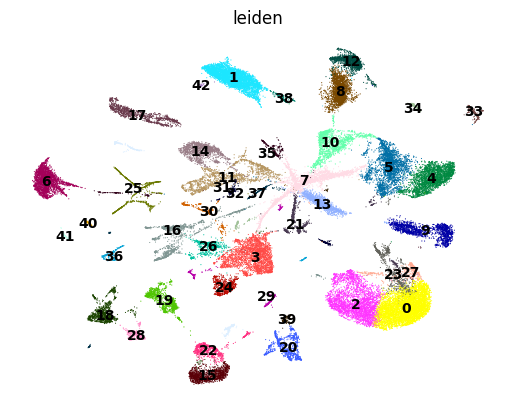

In [22]:
# --- Plot UMAPs ---
sc.pl.umap(ad_hvg, color=["leiden"], legend_loc="on data", frameon=False)
# add any covariates you care about:
# sc.pl.umap(A, color=["model", "age_months", "sample"], frameon=False)

# --- Transfer embeddings/clusters back to full object (optional) ---
ad.obsm["X_pca"] = ad_hvg.obsm["X_pca"]
ad.obsm["X_umap"] = ad_hvg.obsm["X_umap"]
ad.obsp["distances"] = ad_hvg.obsp["distances"]
ad.obsp["connectivities"] = ad_hvg.obsp["connectivities"]
ad.obs["leiden"] = ad_hvg.obs["leiden"].reindex(ad.obs_names).astype("category")


In [64]:
import warnings
warnings.filterwarnings("ignore")

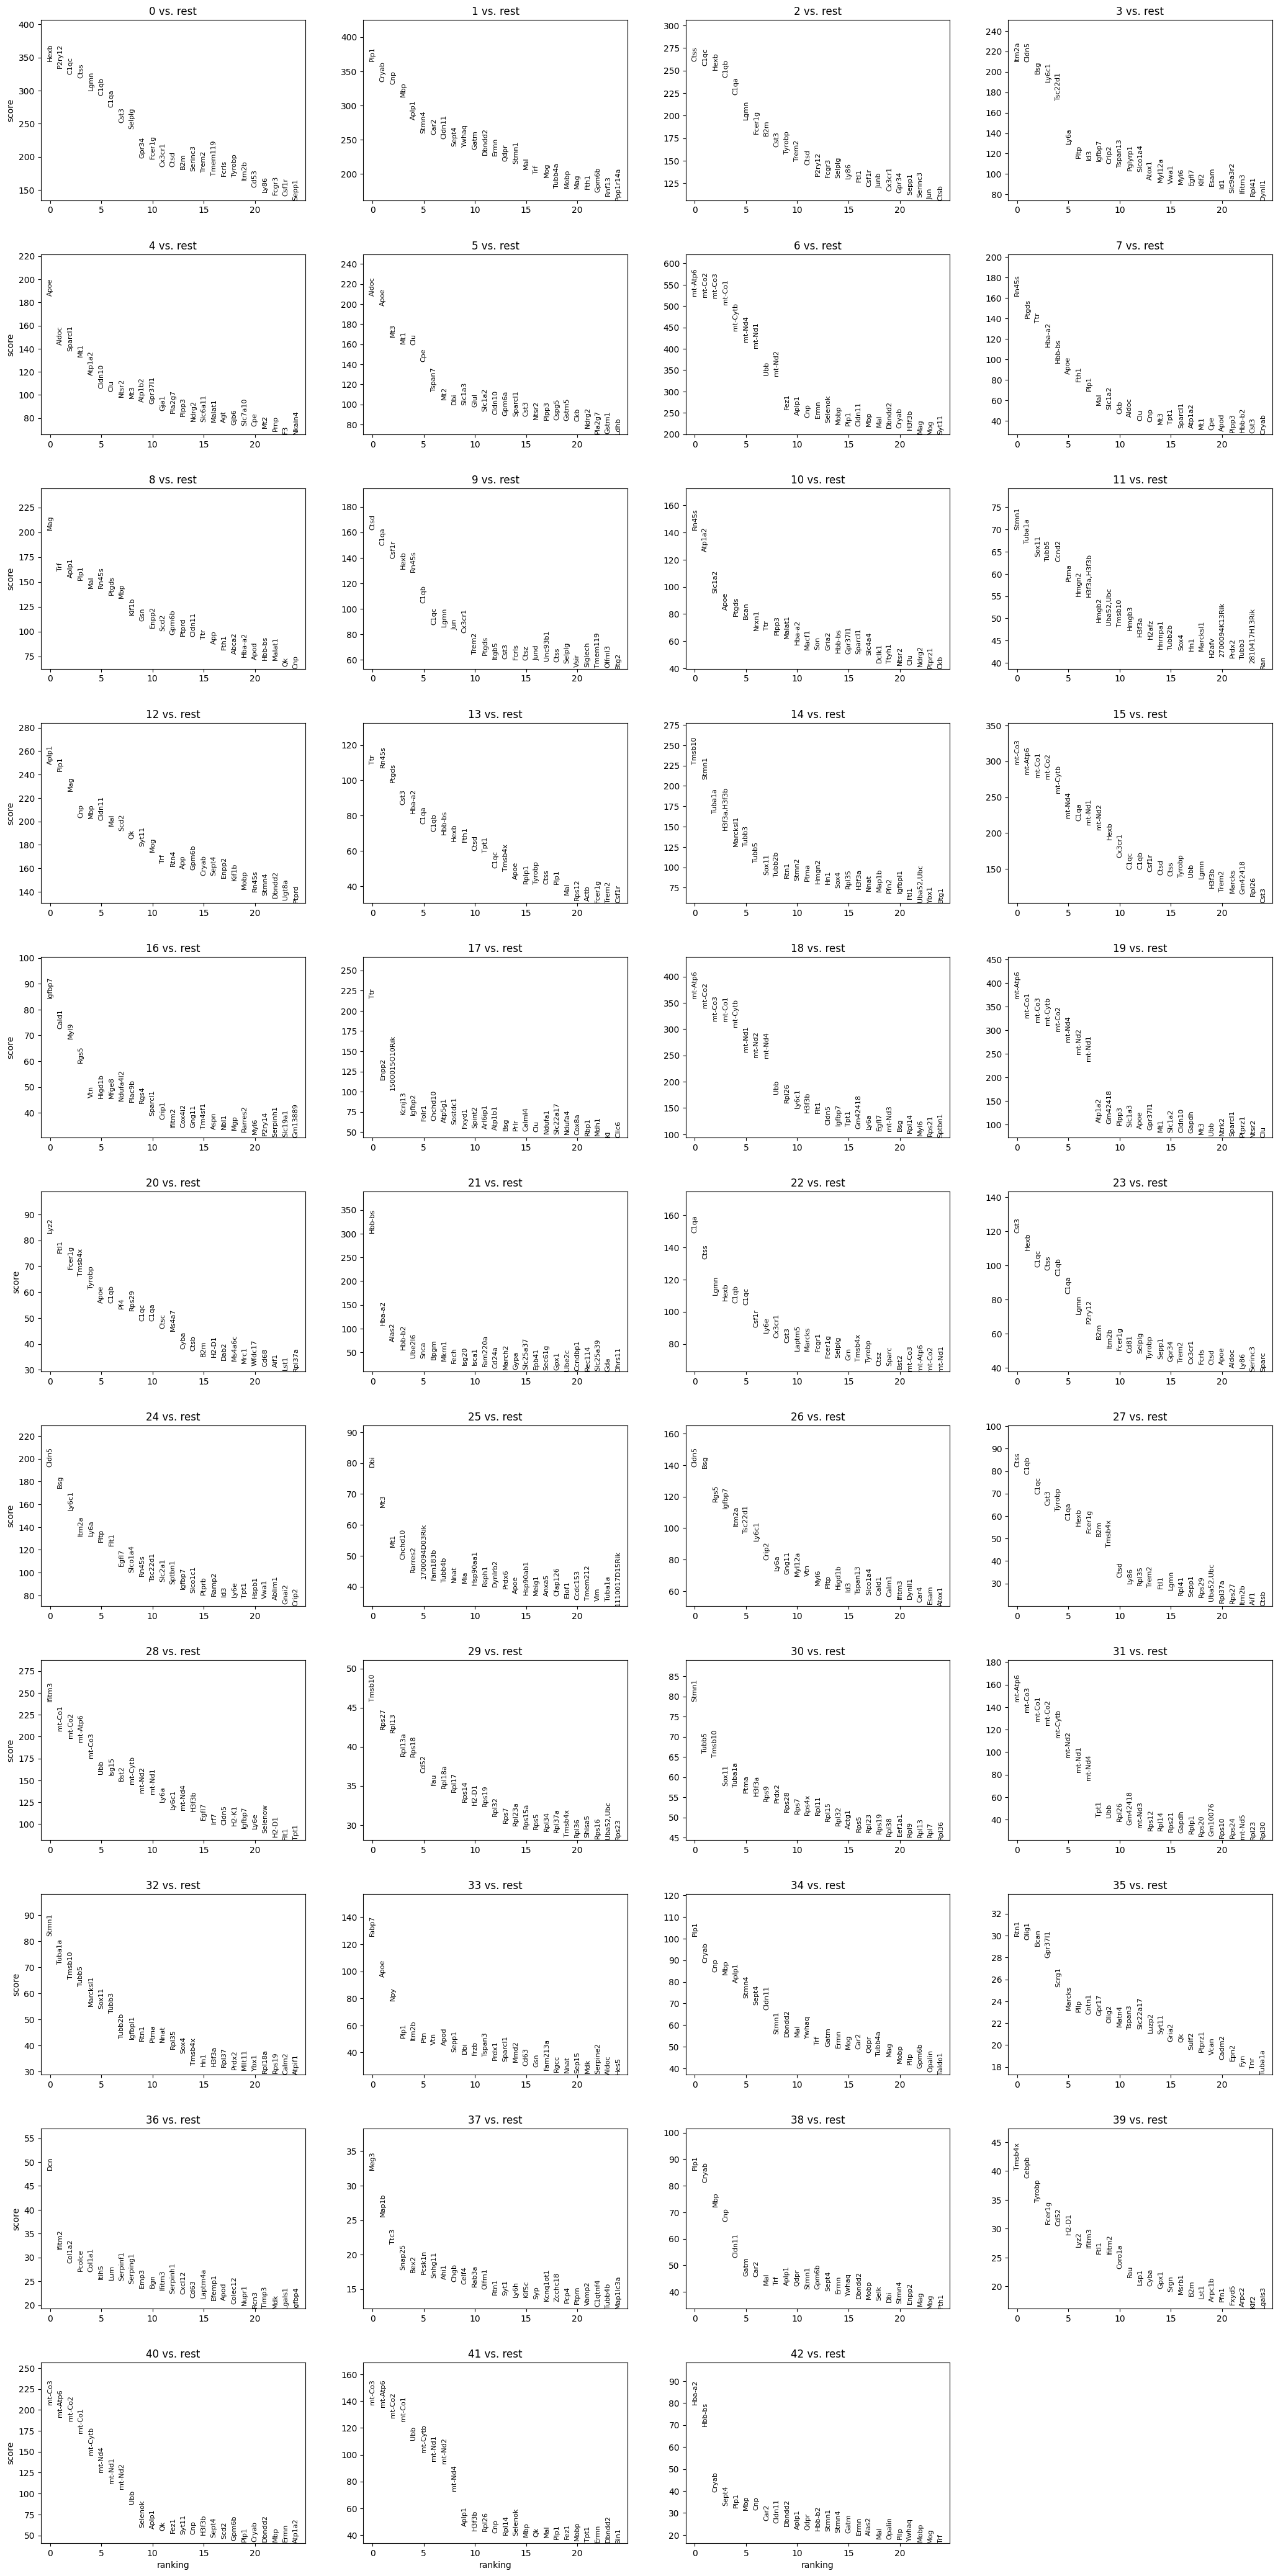

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,Hexb,343.978699,5.235926,0.0,0.0
1,0,P2ry12,333.904053,5.620028,0.0,0.0
2,0,C1qc,324.194916,5.069063,0.0,0.0
3,0,Ctss,318.721924,5.104695,0.0,0.0
4,0,Lgmn,300.314819,4.419962,0.0,0.0


In [65]:

# --- Find marker genes per cluster ---
sc.tl.rank_genes_groups(ad_hvg, groupby="leiden", method="t-test")
sc.pl.rank_genes_groups(ad_hvg, n_genes=25, sharey=False)

# get a tidy table of top markers
markers = sc.get.rank_genes_groups_df(ad_hvg, group=None)
markers.head()

In [66]:
marker_genes = pd.DataFrame({
    group: ad_hvg.uns['rank_genes_groups']['names'][group][:5]
    for group in ad_hvg.uns['rank_genes_groups']['names'].dtype.names
})
marker_genes.head()
#marker_genes.to_csv('../data/broad_markers_leiden0-5.csv')

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,Hexb,Plp1,Ctss,Itm2a,Apoe,Aldoc,mt-Atp6,Rn45s,Mag,Ctsd,...,Fabp7,Plp1,Rtn1,Dcn,Meg3,Plp1,Tmsb4x,mt-Co3,mt-Co3,Hba-a2
1,P2ry12,Cryab,C1qc,Cldn5,Aldoc,Apoe,mt-Co2,Ptgds,Trf,C1qa,...,Apoe,Cryab,Olig1,Ifitm2,Map1b,Cryab,Cebpb,mt-Atp6,mt-Atp6,Hbb-bs
2,C1qc,Cnp,Hexb,Bsg,Sparcl1,Mt3,mt-Co3,Ttr,Aplp1,Csf1r,...,Npy,Cnp,Bcan,Col1a2,Ttc3,Mbp,Tyrobp,mt-Co2,mt-Co2,Cryab
3,Ctss,Mbp,C1qb,Ly6c1,Mt1,Mt1,mt-Co1,Hba-a2,Plp1,Hexb,...,Plp1,Mbp,Gpr37l1,Pcolce,Snap25,Cnp,Fcer1g,mt-Co1,mt-Co1,Sept4
4,Lgmn,Aplp1,C1qa,Tsc22d1,Atp1a2,Clu,mt-Cytb,Hbb-bs,Mal,Rn45s,...,Itm2b,Aplp1,Scrg1,Col1a1,Bex2,Cldn11,Cd52,mt-Cytb,Ubb,Plp1


In [67]:
from mllmcelltype import annotate_clusters, setup_logging

In [68]:
from dotenv import load_dotenv
import os

load_dotenv()  # will read .env into environment
api_key = os.getenv("../OPENAI_API_KEY")

In [69]:
marker_genes = marker_genes.T

In [70]:
marker_genes = marker_genes.reset_index().rename(columns={'index':'cluster'})

In [71]:
marker_genes = marker_genes.set_index("cluster").T.to_dict("list")

In [72]:
import os

# Annotate clusters with a single model
annotations = annotate_clusters(
    marker_genes=marker_genes,  # DataFrame or dictionary of marker genes
    species='mouse',               # Organism species
    provider='openai',            # LLM provider
    model='gpt-4o-mini',               # Specific model
    tissue='brain'                #Tissue context (optional but recommended)
)

# Print annotations
for cluster, annotation in annotations.items():
    print(f"Cluster {cluster}: {annotation}")

2025-09-22 14:17:27 - llmcelltype - INFO - Logging initialized. Log file: /Users/christoffer/.llmcelltype/logs/llmcelltype_20250922_141727.log
2025-09-22 14:17:27 - llmcelltype - INFO - Starting annotation with provider: openai
2025-09-22 14:17:27 - llmcelltype - INFO - Found 43 clusters
2025-09-22 14:17:27 - llmcelltype - INFO - Creating prompt for 43 clusters
2025-09-22 14:17:27 - llmcelltype - INFO - Generated prompt with 2603 characters
2025-09-22 14:17:27 - llmcelltype - INFO - Loaded results from cache (version 1.0): /Users/christoffer/.llmcelltype/cache/71da080d3961ff1b0612120a9436a128.json
2025-09-22 14:17:27 - llmcelltype - INFO - Using cached results
2025-09-22 14:17:27 - llmcelltype - INFO - Successfully parsed response in 'Cluster X: Annotation' format


Cluster 0: Microglia
Cluster 1: Oligodendrocytes
Cluster 2: Microglia
Cluster 3: Endothelial cells
Cluster 4: Astrocytes
Cluster 5: Astrocytes
Cluster 6: Mitochondrial cells
Cluster 7: Erythrocytes
Cluster 8: Oligodendrocytes
Cluster 9: Microglia
Cluster 10: Astrocytes
Cluster 11: Neurons
Cluster 12: Oligodendrocytes
Cluster 13: Erythrocytes
Cluster 14: Neurons
Cluster 15: Mitochondrial cells
Cluster 16: Pericytes
Cluster 17: Unknown
Cluster 18: Mitochondrial cells
Cluster 19: Mitochondrial cells
Cluster 20: Myeloid cells
Cluster 21: Erythrocytes
Cluster 22: Microglia
Cluster 23: Microglia
Cluster 24: Endothelial cells
Cluster 25: Astrocytes
Cluster 26: Endothelial cells
Cluster 27: Microglia
Cluster 28: Mitochondrial cells
Cluster 29: Neurons
Cluster 30: Neurons
Cluster 31: Mitochondrial cells
Cluster 32: Neurons
Cluster 33: Oligodendrocytes
Cluster 34: Oligodendrocytes
Cluster 35: Oligodendrocyte precursor cells
Cluster 36: Mesenchymal cells
Cluster 37: Neurons
Cluster 38: Oligodendr

In [73]:
ad_hvg.obs['cellType'] = ad_hvg.obs.leiden.map(annotations)

In [74]:
import matplotlib.pyplot as plt

... storing 'cellType' as categorical


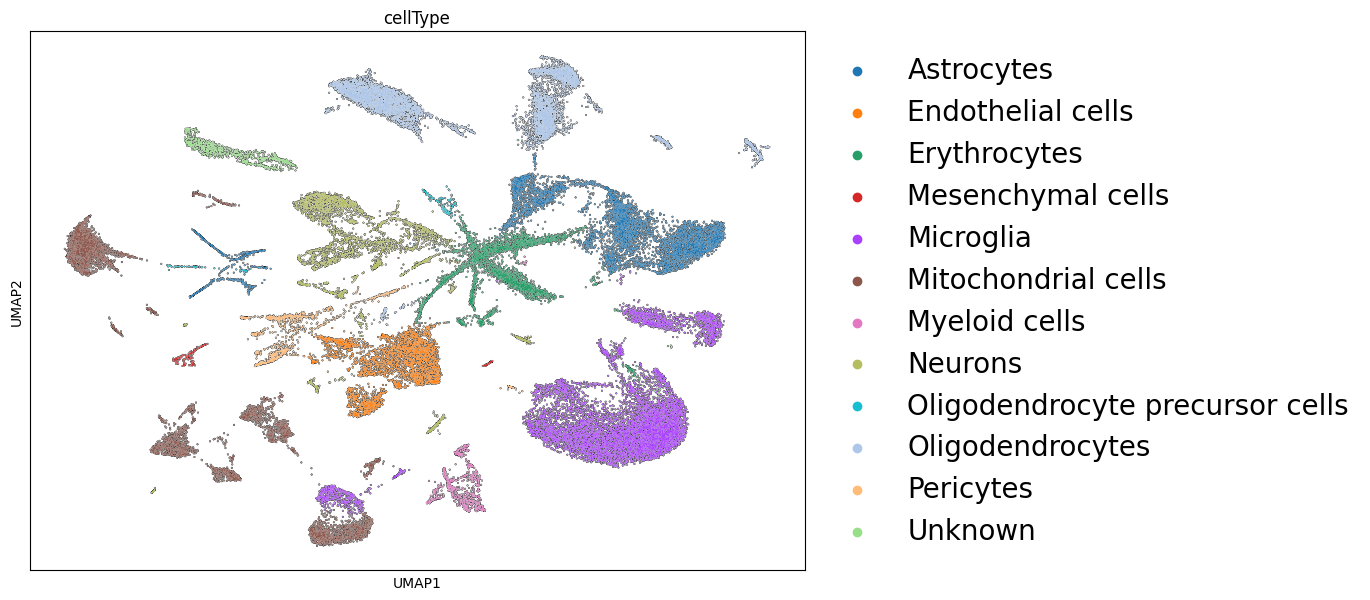

In [75]:
plt.rcdefaults()
with plt.rc_context({'figure.figsize': (10, 7)}):
    sc.pl.umap(ad_hvg,color = ("cellType"),s=3,add_outline=True,legend_fontsize=20,legend_fontoutline=2, ncols= 1, )

In [76]:
list(ad_hvg.obs.file_name.unique())

['GSM7021716_A_3m_filtered_feature_bc_matrix.h5',
 'GSM7021713_C_3m_filtered_feature_bc_matrix.h5',
 'GSM7021715_A_1m_filtered_feature_bc_matrix.h5',
 'GSM7021717_A_6m_filtered_feature_bc_matrix.h5',
 'GSM7021714_C_6m_filtered_feature_bc_matrix.h5',
 'GSM7021712_C_1m_filtered_feature_bc_matrix.h5']

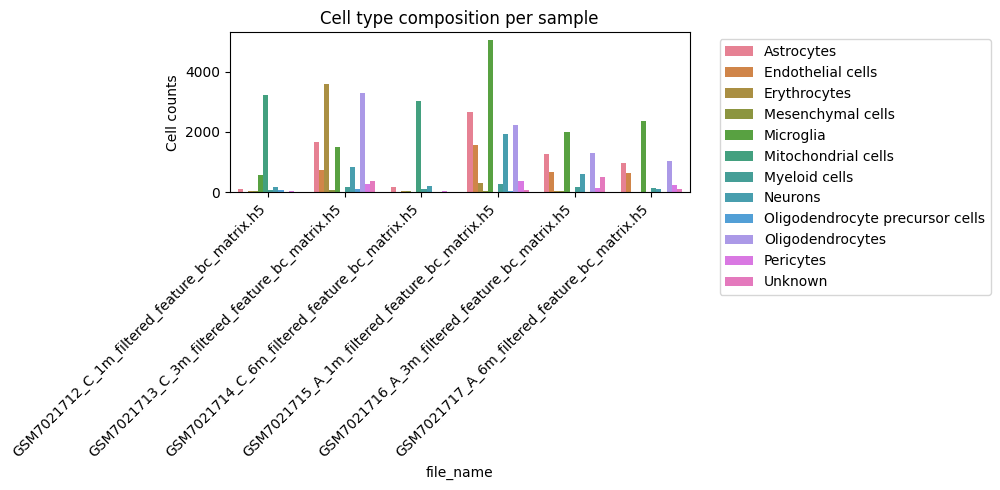

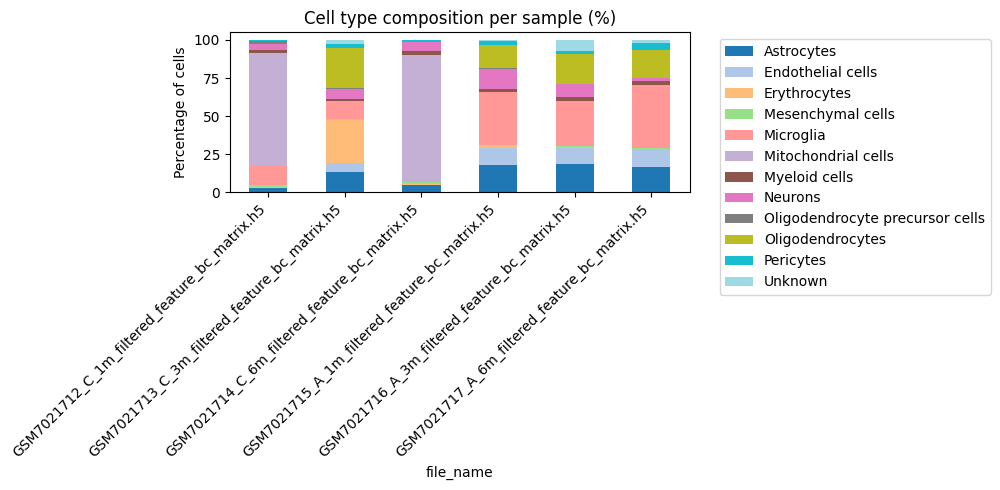

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Build counts table: sample × cellType
ctab = (
    ad_hvg.obs.groupby(["file_name", "cellType"])
    .size()
    .reset_index(name="count")
)

# Add percentages within each sample
ctab["percent"] = ctab.groupby("file_name")["count"].transform(lambda x: 100 * x / x.sum())

# --- Plot raw counts ---
plt.figure(figsize=(10,5))
sns.barplot(data=ctab, x="file_name", y="count", hue="cellType")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Cell counts")
plt.title("Cell type composition per sample")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# --- Plot percentages (stacked bars) ---
pivot_pct = ctab.pivot(index="file_name", columns="cellType", values="percent").fillna(0)

pivot_pct.plot(
    kind="bar",
    stacked=True,
    figsize=(10,5),
    colormap="tab20"
)
plt.ylabel("Percentage of cells")
plt.title("Cell type composition per sample (%)")
plt.xticks(rotation=45, ha="right")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [78]:
import pandas as pd

# GSM → condition + month map
gsm_map = {
    "GSM7021712": {"condition": "Control", "month": 1},
    "GSM7021713": {"condition": "Control", "month": 3},
    "GSM7021714": {"condition": "Control", "month": 6},
    "GSM7021715": {"condition": "APP",     "month": 1},
    "GSM7021716": {"condition": "APP",     "month": 3},
    "GSM7021717": {"condition": "APP",     "month": 6},
}

# Extract GSM prefix from file_name
ad_hvg.obs["GSM"] = ad_hvg.obs["file_name"].str.extract(r"^(GSM\d+)")

# Map condition + month
ad_hvg.obs["condition"] = ad_hvg.obs["GSM"].map(lambda x: gsm_map[x]["condition"] if x in gsm_map else None)
ad_hvg.obs["month"]     = ad_hvg.obs["GSM"].map(lambda x: gsm_map[x]["month"] if x in gsm_map else None)

# Optional: add combined label (e.g. APP-3m)
ad_hvg.obs["group"] = ad_hvg.obs["condition"].astype(str) + "-" + ad_hvg.obs["month"].astype(str) + "m"

# Quick check
print(ad_hvg.obs[["file_name", "GSM", "condition", "month", "group"]].drop_duplicates())

                                                               file_name  \
AAACCTGAGAAGATTC-1-batch0  GSM7021716_A_3m_filtered_feature_bc_matrix.h5   
AAACCCAAGACACACG-1-batch1  GSM7021713_C_3m_filtered_feature_bc_matrix.h5   
AAACCTGAGAGTACAT-1-batch2  GSM7021715_A_1m_filtered_feature_bc_matrix.h5   
AAACCTGAGAGGTTGC-1-batch3  GSM7021717_A_6m_filtered_feature_bc_matrix.h5   
AAACCCAAGCAGGCTA-1-batch4  GSM7021714_C_6m_filtered_feature_bc_matrix.h5   
AAACCCAAGTTAACGA-1-batch5  GSM7021712_C_1m_filtered_feature_bc_matrix.h5   

                                  GSM condition  month       group  
AAACCTGAGAAGATTC-1-batch0  GSM7021716       APP      3      APP-3m  
AAACCCAAGACACACG-1-batch1  GSM7021713   Control      3  Control-3m  
AAACCTGAGAGTACAT-1-batch2  GSM7021715       APP      1      APP-1m  
AAACCTGAGAGGTTGC-1-batch3  GSM7021717       APP      6      APP-6m  
AAACCCAAGCAGGCTA-1-batch4  GSM7021714   Control      6  Control-6m  
AAACCCAAGTTAACGA-1-batch5  GSM7021712   Control      

In [79]:
ad_hvg.obs

,file_name,batch,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,...,leiden_0.2,leiden_0.4,leiden_0.8,leiden_1.2,leiden,cellType,GSM,condition,month,group
AAACCTGAGAAGATTC-1-batch0,GSM7021716_A_3m_filtered_feature_bc_matrix.h5,batch0,894,6.796824,1441.0,7.273787,28.660652,37.751561,51.630812,72.657876,...,4,4,3,5,3,Endothelial cells,GSM7021716,APP,3,APP-3m
AAACCTGAGATGTGTA-1-batch0,GSM7021716_A_3m_filtered_feature_bc_matrix.h5,batch0,556,6.322565,1023.0,6.931472,40.957967,52.785924,65.200391,94.525904,...,18,22,29,43,29,Neurons,GSM7021716,APP,3,APP-3m
AAACCTGAGCTTATCG-1-batch0,GSM7021716_A_3m_filtered_feature_bc_matrix.h5,batch0,599,6.396930,1066.0,6.972606,43.339587,52.908068,62.570356,90.712946,...,0,0,0,0,0,Microglia,GSM7021716,APP,3,APP-3m
AAACCTGCACGAGGTA-1-batch0,GSM7021716_A_3m_filtered_feature_bc_matrix.h5,batch0,940,6.846943,1750.0,7.467942,36.457143,45.257143,56.685714,74.857143,...,0,0,0,0,0,Microglia,GSM7021716,APP,3,APP-3m
AAACCTGCAGATAATG-1-batch0,GSM7021716_A_3m_filtered_feature_bc_matrix.h5,batch0,1312,7.180070,3180.0,8.064951,41.918239,48.993711,58.962264,74.465409,...,2,1,1,1,1,Oligodendrocytes,GSM7021716,APP,3,APP-3m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGCAAGACTGG-1-batch5,GSM7021712_C_1m_filtered_feature_bc_matrix.h5,batch5,1377,7.228388,3153.0,8.056427,37.900412,46.875991,57.278782,72.185220,...,8,9,15,13,15,Mitochondrial cells,GSM7021712,Control,1,Control-1m
TTTGTTGCAGTTTCGA-1-batch5,GSM7021712_C_1m_filtered_feature_bc_matrix.h5,batch5,4822,8.481151,22274.0,10.011220,32.329173,39.579779,47.723804,60.905091,...,7,8,6,4,6,Mitochondrial cells,GSM7021712,Control,1,Control-1m
TTTGTTGGTATTTCGG-1-batch5,GSM7021712_C_1m_filtered_feature_bc_matrix.h5,batch5,4939,8.505121,26858.0,10.198357,32.117060,39.373743,47.326681,60.845930,...,7,8,6,4,6,Mitochondrial cells,GSM7021712,Control,1,Control-1m
TTTGTTGTCTGCGGAC-1-batch5,GSM7021712_C_1m_filtered_feature_bc_matrix.h5,batch5,731,6.595781,1297.0,7.168580,33.153431,45.026985,59.059368,82.189668,...,11,13,28,32,28,Mitochondrial cells,GSM7021712,Control,1,Control-1m


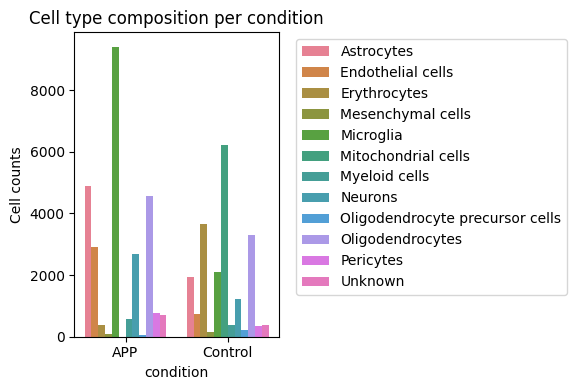

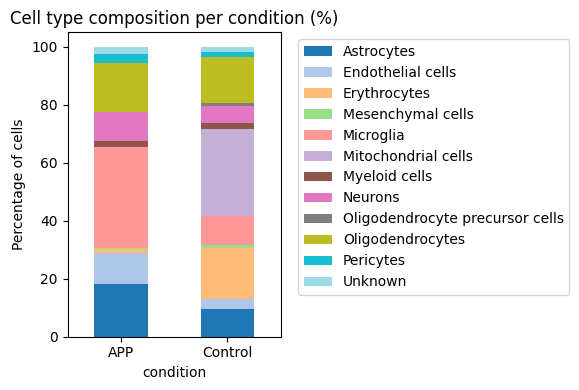

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- by CONDITION: counts + stacked percentages ---
ctab_cond = (
    ad_hvg.obs.groupby(["condition", "cellType"])
    .size()
    .reset_index(name="count")
)
ctab_cond["percent"] = ctab_cond.groupby("condition")["count"].transform(lambda x: 100 * x / x.sum())

# Raw counts per condition
plt.figure(figsize=(6,4))
sns.barplot(data=ctab_cond, x="condition", y="count", hue="cellType")
plt.ylabel("Cell counts")
plt.title("Cell type composition per condition")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Stacked % per condition
pivot_pct_cond = ctab_cond.pivot(index="condition", columns="cellType", values="percent").fillna(0)
pivot_pct_cond.plot(kind="bar", stacked=True, figsize=(6,4), colormap="tab20")
plt.ylabel("Percentage of cells")
plt.title("Cell type composition per condition (%)")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

... storing 'GSM' as categorical
... storing 'condition' as categorical
... storing 'group' as categorical


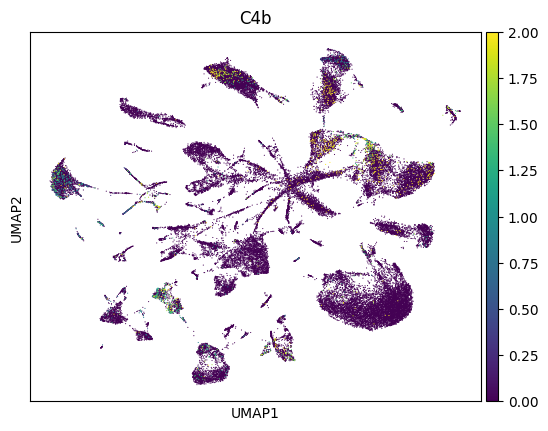

In [81]:
sc.pl.umap(ad_hvg, color = 'C4b', vmax = '2')

In [82]:
ad_hvg_OL = ad_hvg[ad_hvg.obs.cellType.str.contains('ligo')]

In [83]:
ad_hvg_OL.obs

,file_name,batch,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,...,leiden_0.2,leiden_0.4,leiden_0.8,leiden_1.2,leiden,cellType,GSM,condition,month,group
AAACCTGCAGATAATG-1-batch0,GSM7021716_A_3m_filtered_feature_bc_matrix.h5,batch0,1312,7.180070,3180.0,8.064951,41.918239,48.993711,58.962264,74.465409,...,2,1,1,1,1,Oligodendrocytes,GSM7021716,APP,3,APP-3m
AAACCTGCATCGGGTC-1-batch0,GSM7021716_A_3m_filtered_feature_bc_matrix.h5,batch0,1106,7.009409,2240.0,7.714677,35.669643,43.794643,54.687500,72.946429,...,2,1,1,1,1,Oligodendrocytes,GSM7021716,APP,3,APP-3m
AAACCTGGTCTAGAGG-1-batch0,GSM7021716_A_3m_filtered_feature_bc_matrix.h5,batch0,1096,7.000334,2138.0,7.668094,36.997194,44.948550,55.144995,72.123480,...,2,1,1,1,1,Oligodendrocytes,GSM7021716,APP,3,APP-3m
AAACCTGTCATCACCC-1-batch0,GSM7021716_A_3m_filtered_feature_bc_matrix.h5,batch0,1825,7.509883,4660.0,8.446985,36.802575,43.583691,52.725322,68.519313,...,2,1,1,1,1,Oligodendrocytes,GSM7021716,APP,3,APP-3m
AAACCTGTCTCGCTTG-1-batch0,GSM7021716_A_3m_filtered_feature_bc_matrix.h5,batch0,975,6.883463,1916.0,7.558517,40.240084,48.434238,58.872651,75.208768,...,2,1,1,1,1,Oligodendrocytes,GSM7021716,APP,3,APP-3m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCATTGGTTACCGTA-1-batch5,GSM7021712_C_1m_filtered_feature_bc_matrix.h5,batch5,3382,8.126518,10665.0,9.274817,26.451008,34.027192,44.181903,59.531177,...,24,26,35,37,35,Oligodendrocyte precursor cells,GSM7021712,Control,1,Control-1m
TTCGCTGCATGTTCGA-1-batch5,GSM7021712_C_1m_filtered_feature_bc_matrix.h5,batch5,3290,8.098947,9870.0,9.197356,26.940223,33.991895,42.938197,58.470111,...,24,26,35,37,35,Oligodendrocyte precursor cells,GSM7021712,Control,1,Control-1m
TTCTCTCTCGGCTGTG-1-batch5,GSM7021712_C_1m_filtered_feature_bc_matrix.h5,batch5,2756,7.921898,7895.0,8.974112,26.231792,34.629512,45.028499,61.127296,...,24,26,35,37,35,Oligodendrocyte precursor cells,GSM7021712,Control,1,Control-1m
TTGATGGAGTGCCGAA-1-batch5,GSM7021712_C_1m_filtered_feature_bc_matrix.h5,batch5,3375,8.124447,11361.0,9.338030,25.737171,34.090309,44.855206,61.059766,...,24,26,35,37,35,Oligodendrocyte precursor cells,GSM7021712,Control,1,Control-1m


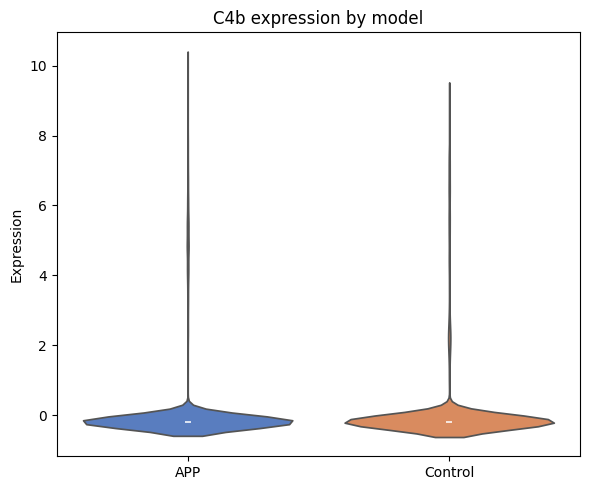

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# pick gene
gene = "C4b"

# extract expression vector
if gene not in ad_hvg_OL.var_names:
    raise ValueError(f"{gene} not found in adata.var_names")

c4b_expr = ad_hvg_OL[:, gene].X
if hasattr(c4b_expr, "toarray"):  # handle sparse matrix
    c4b_expr = c4b_expr.toarray().ravel()
else:
    c4b_expr = np.asarray(c4b_expr).ravel()

# build dataframe
df = pd.DataFrame({
    "C4b_expr": c4b_expr,
    "model": ad_hvg_OL.obs["condition"].values
})

plt.figure(figsize=(6,5))
sns.violinplot(data=df, x="model", y="C4b_expr", inner="box", palette="muted")
plt.title("C4b expression by model")
plt.ylabel("Expression")
plt.xlabel("")
plt.tight_layout()
plt.show()

In [87]:
ad_hvg.obs

,file_name,batch,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,...,leiden_0.2,leiden_0.4,leiden_0.8,leiden_1.2,leiden,cellType,GSM,condition,month,group
AAACCTGAGAAGATTC-1-batch0,GSM7021716_A_3m_filtered_feature_bc_matrix.h5,batch0,894,6.796824,1441.0,7.273787,28.660652,37.751561,51.630812,72.657876,...,4,4,3,5,3,Endothelial cells,GSM7021716,APP,3,APP-3m
AAACCTGAGATGTGTA-1-batch0,GSM7021716_A_3m_filtered_feature_bc_matrix.h5,batch0,556,6.322565,1023.0,6.931472,40.957967,52.785924,65.200391,94.525904,...,18,22,29,43,29,Neurons,GSM7021716,APP,3,APP-3m
AAACCTGAGCTTATCG-1-batch0,GSM7021716_A_3m_filtered_feature_bc_matrix.h5,batch0,599,6.396930,1066.0,6.972606,43.339587,52.908068,62.570356,90.712946,...,0,0,0,0,0,Microglia,GSM7021716,APP,3,APP-3m
AAACCTGCACGAGGTA-1-batch0,GSM7021716_A_3m_filtered_feature_bc_matrix.h5,batch0,940,6.846943,1750.0,7.467942,36.457143,45.257143,56.685714,74.857143,...,0,0,0,0,0,Microglia,GSM7021716,APP,3,APP-3m
AAACCTGCAGATAATG-1-batch0,GSM7021716_A_3m_filtered_feature_bc_matrix.h5,batch0,1312,7.180070,3180.0,8.064951,41.918239,48.993711,58.962264,74.465409,...,2,1,1,1,1,Oligodendrocytes,GSM7021716,APP,3,APP-3m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGCAAGACTGG-1-batch5,GSM7021712_C_1m_filtered_feature_bc_matrix.h5,batch5,1377,7.228388,3153.0,8.056427,37.900412,46.875991,57.278782,72.185220,...,8,9,15,13,15,Mitochondrial cells,GSM7021712,Control,1,Control-1m
TTTGTTGCAGTTTCGA-1-batch5,GSM7021712_C_1m_filtered_feature_bc_matrix.h5,batch5,4822,8.481151,22274.0,10.011220,32.329173,39.579779,47.723804,60.905091,...,7,8,6,4,6,Mitochondrial cells,GSM7021712,Control,1,Control-1m
TTTGTTGGTATTTCGG-1-batch5,GSM7021712_C_1m_filtered_feature_bc_matrix.h5,batch5,4939,8.505121,26858.0,10.198357,32.117060,39.373743,47.326681,60.845930,...,7,8,6,4,6,Mitochondrial cells,GSM7021712,Control,1,Control-1m
TTTGTTGTCTGCGGAC-1-batch5,GSM7021712_C_1m_filtered_feature_bc_matrix.h5,batch5,731,6.595781,1297.0,7.168580,33.153431,45.026985,59.059368,82.189668,...,11,13,28,32,28,Mitochondrial cells,GSM7021712,Control,1,Control-1m


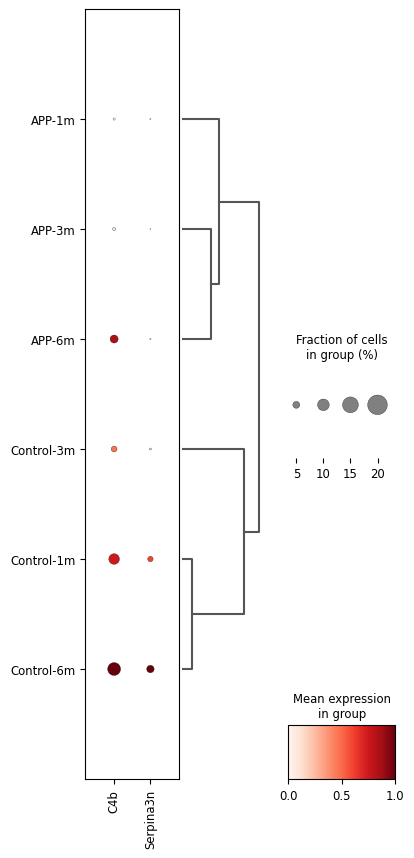

In [89]:
 sc.pl.dotplot(
        ad_hvg,
        var_names=['C4b','Serpina3n'],
        groupby="group",
        standard_scale="var",
        #dot_max=0.5,
        #dot_min=0.05,
        color_map="Reds",
        dendrogram=True,
        figsize=(4, 10)
    )